# Cálculo de mensalidades para uma escola de período integral

O cálculo será feito baseado nos valores do ano 2023 e depois será calculado um reajuste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

Lendo o arquivo que contem os valores tabelados de mensalidade e os efetivamentente pagos em função do número de horas na escola para o mês de agosto.

In [2]:
mens_ago = pd.read_csv('../dados/mensalidades_ago.csv')
mens_ago

,horas,pago,tabelado
0,4.0,1130.370000,1339.5800
1,4.0,964.324850,1339.5800
2,4.0,964.885101,1339.5800
3,4.0,992.371000,1339.5800
4,4.0,1173.910000,1339.5800
5,4.0,1023.957934,1339.5800
6,5.0,1137.170000,1503.0050
7,6.0,1144.530000,1666.4300
8,6.0,1115.850000,1666.4300
9,6.0,1530.630000,1666.4300


Lendo o arquivo que contem os valores tabelados de mensalidade para o ano de 2023.

In [3]:
plano_2023 = pd.read_csv('../dados/plano_2023.csv')
plano_2023

,horas,valores
0,4.0,1339.58
1,6.0,1666.43
2,8.0,1874.48
3,10.0,2314.47
4,12.0,2684.79


Gráfico para comparar os valores tabelados e os efetivamente pagos em agosto de 2023.

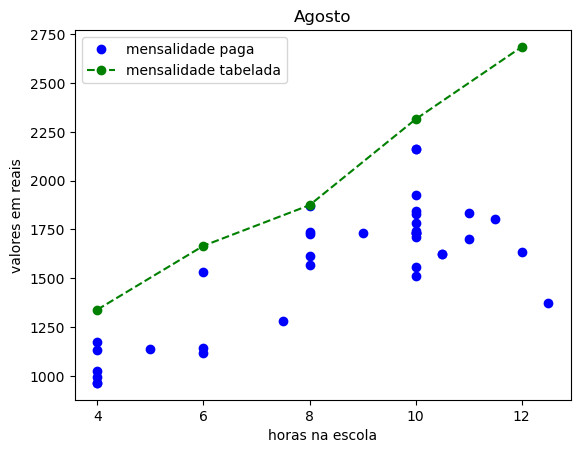

In [4]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['pago'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='dashed',
    label='mensalidade tabelada',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023.png')

Gráfico contendo todas as combinações possíveis de desconto.

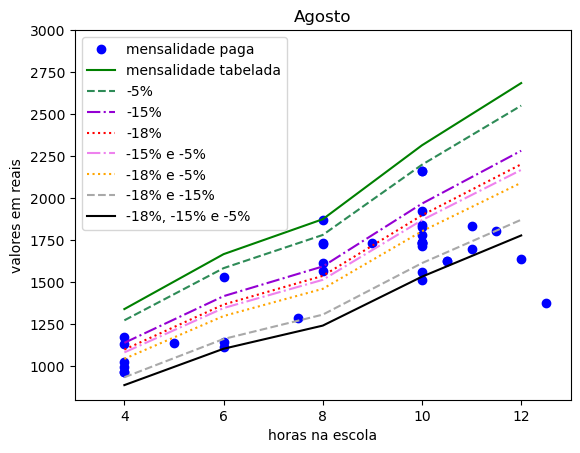

In [5]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['pago'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    color='green',
    linestyle='-',
    label='mensalidade tabelada',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.95,
    color='seagreen',
    linestyle='--',
    label='-5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.85,
    color='darkviolet',
    linestyle='-.',
    label='-15%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82,
    color='red',
    linestyle=':',
    label='-18%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.85*0.95,
    color='violet',
    linestyle='-.',
    label='-15% e -5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.95,
    color='orange',
    linestyle=':',
    label='-18% e -5%',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.85,
    color='darkgray',
    linestyle='--',
    label='-18% e -15%',
)
ax.plot(
    plano_2023['horas'],
    plano_2023['valores']*0.82*0.85*0.95,
    color='black',
    linestyle='-',
    label='-18%, -15% e -5%',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)
ax.set_xlim(3,13)
ax.set_ylim(800,3000)

fig.savefig('../imagens/mensalidades_2023_descontos.png')

# Modelo 1 para as mensalidades tabeladas para 2023

Vamos do simples para o complexo...

Modelo linear com o número de horas.

In [6]:
x = np.array(plano_2023['horas']).reshape((-1, 1))
y = np.array(plano_2023['valores'])
modelo = LinearRegression().fit(x, y)
# y = a x + b
a = modelo.coef_[0]
b = modelo.intercept_

In [7]:
print(f"coeficiente linear: ",b)
print(f"coeficiente angular:",a)

coeficiente linear:  640.5660000000003
coeficiente angular: 166.92299999999997


Definindo como primeiro modelo a ser testado:

In [8]:
def modelo1(h):
    return np.round((a*h+b),2)

# vetorizando a função para receber arrays de argumento
v_modelo1 = np.vectorize(modelo1)

Gráfico do modelo linear

In [9]:
h = np.array(range(4,13))

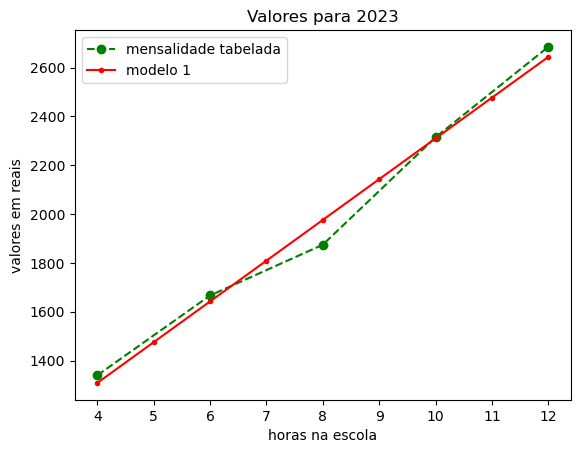

In [10]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='mensalidade tabelada',
)
ax.plot(
    h,
    v_modelo1(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo 1',
)


ax.set_title('Valores para 2023')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_fitlinear.png')

Quero verificar se esse modelo simples é capaz de suprir as despesas da escola. Vou usar a despesa média dos meses estudados e o número médio de alunos no mesmo período.

In [11]:
despesas = pd.read_csv('../dados/despesas_2023.csv')
despesas

,meses,valores,n
0,6,58136.22,43
1,7,73274.51,43
2,8,74271.44,40
3,9,64923.11,33
4,10,55771.65,33


In [12]:
despesa_media=despesas['valores'].mean()
despesa_media

65275.386

In [13]:
n_medio=despesas['n'].mean()
n_medio

38.4

In [14]:
# media de horas de permanencia de um aluno na escola
mens_ago['horas'].mean()

8.445945945945946

Cálculo do custo médio de 1 aluno:


In [15]:
custo_aluno = despesas['valores'].sum()/despesas['n'].sum()
custo_aluno

1699.87984375

Cálculo da mensalidade média paga por aluno segundo o modelo.

Para o cálculo, vou a distribuição do mês de agosto como referência.

In [16]:
mens_ago['modelo 1'] = v_modelo1(mens_ago['horas'])
mens_ago

,horas,pago,tabelado,modelo 1
0,4.0,1130.370000,1339.5800,1308.26
1,4.0,964.324850,1339.5800,1308.26
2,4.0,964.885101,1339.5800,1308.26
3,4.0,992.371000,1339.5800,1308.26
4,4.0,1173.910000,1339.5800,1308.26
5,4.0,1023.957934,1339.5800,1308.26
6,5.0,1137.170000,1503.0050,1475.18
7,6.0,1144.530000,1666.4300,1642.10
8,6.0,1115.850000,1666.4300,1642.10
9,6.0,1530.630000,1666.4300,1642.10


In [17]:
# mensalidade média segundo modelo 1
mens1 = mens_ago['modelo 1'].mean()
mens1

2050.3900000000003

In [18]:
# lucro médio por aluno
mens1-custo_aluno

350.51015625000036

In [19]:
# lucro médio mensal possível nos meses estudados com o modelo linear
(mens1-custo_aluno)*despesas['n'].mean()

13459.590000000013

In [20]:
# lucro médio mensal possível nos meses estudados com a tabela vigente
(mens_ago['tabelado'].mean()-custo_aluno)*despesas['n'].mean()

13281.027405405397

## Comparando o modelo 1 com a concorrência estudada. 

In [21]:
concorrencia = pd.read_csv('../dados/concorrencia.csv')
concorrencia

,horas,A,B
0,4.0,938.21,1047.20
1,6.0,2253.22,1204.28
2,8.0,2425.41,2513.27
3,10.0,2894.98,2722.71
4,12.0,3019.42,2932.15


Gráfico comparando a tabela, o modelo e a concorrência:

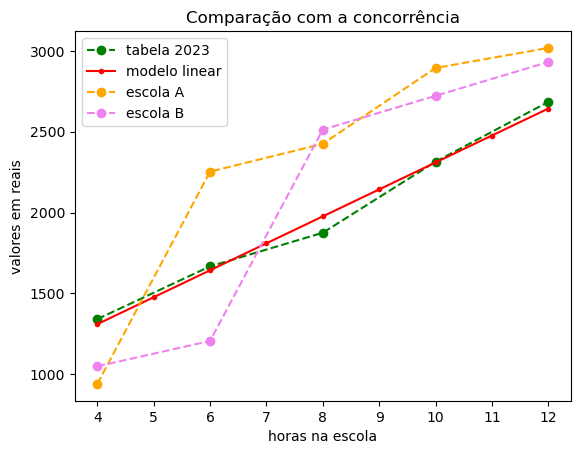

In [22]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='tabela 2023',
)
ax.plot(
    h,
    v_modelo1(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo linear',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='--',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='--',
    label='escola B',
)

ax.set_title('Comparação com a concorrência')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_concorrencia.png')

# Modelo 2 para as mensalidades tabeladas para 2023

Cálculo do valor médio da hora no modelo linear (usamos o mês de agosto como referência para a distribuição dos alunos segundo as horas de permanência na escola))

In [23]:
valor_hora_modelo1 = np.round(mens1/mens_ago['horas'].mean(),2)
valor_hora_modelo1

242.77

Cálculo do custo de 1 aluno por hora de permanência na escola

In [24]:
np.round(custo_aluno/mens_ago['horas'].mean(),2)

201.27

Considerando a mesma distribuição, queremos quanto seria o valor médio da hora nas escolas A e B.

In [25]:
mens_ago2  = mens_ago.merge(concorrencia, left_on='horas', right_on='horas', how='left')

In [26]:
mens_ago2.set_index('horas')

,pago,tabelado,modelo 1,A,B
horas,,,,,
4.0,1130.370000,1339.5800,1308.26,938.21,1047.20
4.0,964.324850,1339.5800,1308.26,938.21,1047.20
4.0,964.885101,1339.5800,1308.26,938.21,1047.20
4.0,992.371000,1339.5800,1308.26,938.21,1047.20
4.0,1173.910000,1339.5800,1308.26,938.21,1047.20
4.0,1023.957934,1339.5800,1308.26,938.21,1047.20
5.0,1137.170000,1503.0050,1475.18,NaN,NaN
6.0,1144.530000,1666.4300,1642.10,2253.22,1204.28
6.0,1115.850000,1666.4300,1642.10,2253.22,1204.28


In [27]:
# interpolação linear para prever valores não estipulados na tabela da concorrência
mens_ago3 = mens_ago2.interpolate(method='index')

In [28]:
# media do valor da hora na escola A
valor_hora_A = np.round(mens_ago3['A'].mean()/mens_ago['horas'].mean(),2)
valor_hora_A

285.88

In [29]:
# media do valor da hora na escola B
valor_hora_B = np.round(mens_ago3['B'].mean()/mens_ago['horas'].mean(),2)
valor_hora_B

266.74

Gráfico com as mensalidades médias considerando a disribuição de agosto

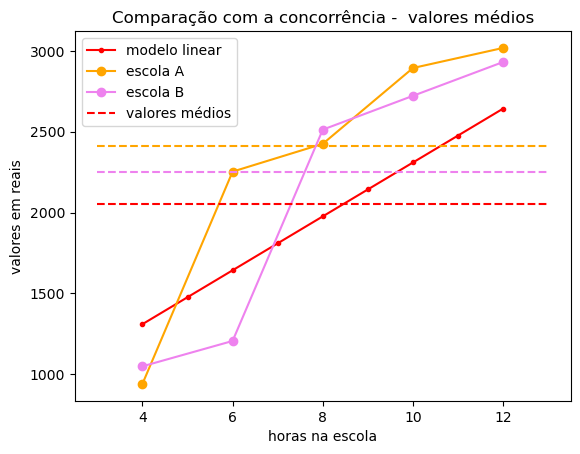

In [30]:
fig, ax = plt.subplots()

ax.plot(
    h,
    v_modelo1(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo linear',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B',
)

ax.hlines(
    [mens_ago3['modelo 1'].mean(), mens_ago3['A'].mean(), mens_ago3['B'].mean()],
    3, 13,
    color =['red','orange', 'violet'],
    linestyle='--',
    label='valores médios',
)

ax.set_title('Comparação com a concorrência -  valores médios')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_concorrencia_media.png')

Mensalidade para 4 horas das escolas A e B.

In [31]:
concorrencia['A'][0]

938.21

In [32]:
concorrencia['B'][0]

1047.2

In [33]:
modelo1(4)

1308.26

In [34]:
# média
(concorrencia['A'][0]+concorrencia['B'][0])/2

992.705

Vamos usar um modelo linear onde o valor da hora é de R$ 250.

In [35]:
def modelo2(h):
    return 250*h

# vetorizando a função para receber arrays de argumento
v_modelo2 = np.vectorize(modelo2)

Gráfico do modelo 2

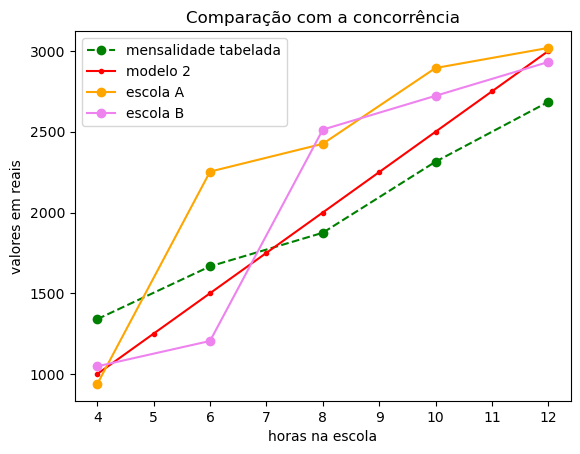

In [36]:
fig, ax = plt.subplots()

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='mensalidade tabelada',
)

ax.plot(
    h,
    v_modelo2(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo 2',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B',
)


ax.set_title('Comparação com a concorrência')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_modelo2.png')

In [37]:
mens_ago['modelo 2'] = v_modelo2(mens_ago['horas'])

Definindo um teste para saber se os modelos mais complexos também serão capazes de suprir as despesas e ganhar da concorrência.

In [38]:
def teste(modelo):
    if mens_ago[modelo].mean() <= despesas['valores'].mean():
        print('lucro mensal médio de ','R$',np.round((mens_ago[modelo].mean()-custo_aluno)*despesas['n'].mean(),2)  )
    else:
        print('não cobre as despesas')

In [39]:
teste('modelo 1')

lucro mensal médio de  R$ 13459.59


In [40]:
teste('modelo 2')

lucro mensal médio de  R$ 15805.7


#  Modelo 3 para o cálculo de mensalidades

Suavizando a curva de mensalidades para mais de 8h de permanência na escola.

O desconto seá aplicado no valor das horas excedentes a 8h.

In [41]:
def modelo3(h):
    if h<=8:
        f = 1
    elif h<=9:
        f = 0.95
    elif h<=10:
        f = 0.90
    elif h<=11:
        f = 0.85 
    else:
        f = 0.80
    return np.round(modelo2(h)*f,2)

# vetorizando a função para receber arrays de argumento
v_modelo3 = np.vectorize(modelo3)

In [42]:
v_modelo3(h)

array([1000, 1250, 1500, 1750, 2000, 2137, 2250, 2337, 2400])

Gráfico do modelo suavizado

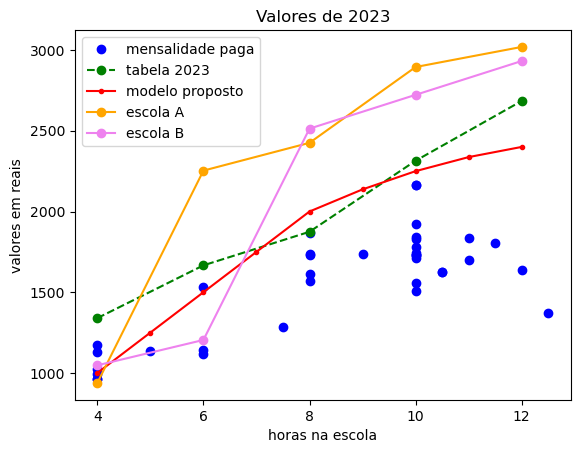

In [43]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['pago'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='o',
    color='green',
    linestyle='--',
    label='tabela 2023',
)
ax.plot(
    h,
    v_modelo3(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo proposto',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B',
)

ax.set_title('Valores de 2023')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023_modelo3.png')

In [44]:
mens_ago['modelo 3'] = v_modelo3(mens_ago['horas'])

In [45]:
teste('modelo 3')

lucro mensal médio de  R$ 8774.34


Cálculo da discrepância entre entre o valor pago em agosto e o modelo proposto.

In [46]:
(mens_ago['modelo 3']-mens_ago['pago'])/mens_ago['pago']

0    -0.115334
1     0.036995
2     0.036393
3     0.007688
4    -0.148146
5    -0.023397
6     0.099220
7     0.310582
8     0.344267
9    -0.020011
10    0.460735
11    0.239826
12    0.152738
13    0.069707
14    0.275380
15    0.232486
16    0.157736
17    0.489918
18    0.220875
19    0.299069
20    0.444298
21    0.040025
22    0.262322
23    0.314053
24    0.230746
25    0.040025
26    0.299069
27    0.292272
28    0.299069
29    0.168570
30    0.373508
31    0.373508
32    0.273870
33    0.375000
34    0.275051
35    0.468159
36    0.819955
dtype: float64

Seguir o novo modelo aumenta o valor pago em quantos %?

<Axes: >

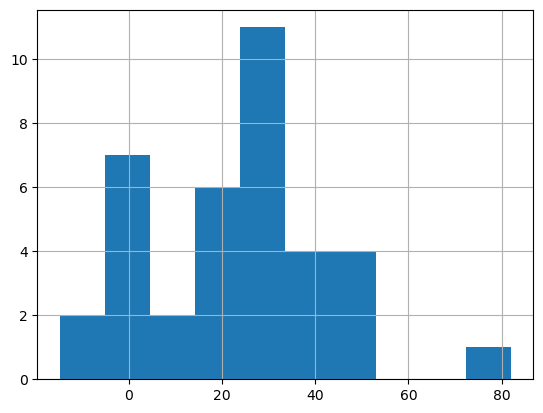

In [47]:
aumento = (100*(mens_ago['modelo 3']-mens_ago['pago'])/mens_ago['pago'])
aumento.hist()

Considerando a ideia de aumentar no máximo 12%.

In [48]:
sum(aumento>12)/len(mens_ago) # aumento maior que 12% para 70% dos alunos seguindo a tabela nova

0.7027027027027027

In [49]:
mens_ago['reajustado'] =[
                        np.round(min(1.12*mens_ago['pago'][i],mens_ago['modelo 3'][i]),2)
                        for i in range(len(mens_ago))
                        ]
mens_ago


,horas,pago,tabelado,modelo 1,modelo 2,modelo 3,reajustado
0,4.0,1130.370000,1339.5800,1308.26,1000.0,1000.00,1000.00
1,4.0,964.324850,1339.5800,1308.26,1000.0,1000.00,1000.00
2,4.0,964.885101,1339.5800,1308.26,1000.0,1000.00,1000.00
3,4.0,992.371000,1339.5800,1308.26,1000.0,1000.00,1000.00
4,4.0,1173.910000,1339.5800,1308.26,1000.0,1000.00,1000.00
5,4.0,1023.957934,1339.5800,1308.26,1000.0,1000.00,1000.00
6,5.0,1137.170000,1503.0050,1475.18,1250.0,1250.00,1250.00
7,6.0,1144.530000,1666.4300,1642.10,1500.0,1500.00,1281.87
8,6.0,1115.850000,1666.4300,1642.10,1500.0,1500.00,1249.75
9,6.0,1530.630000,1666.4300,1642.10,1500.0,1500.00,1500.00


Transformamos os descontos aleatórios de 2023 em bolsas para 2024. A direção da escola decidiu abrir mão dos descontos de 18 e 15%.

In [50]:
mens_ago['bolsa%'] = [
                      np.round(max(0,100*(mens_ago['modelo 3'][i]-mens_ago['reajustado'][i])/mens_ago['modelo 3'][i]),1)
                      for i in range(len(mens_ago))
                    ]
mens_ago

,horas,pago,tabelado,modelo 1,modelo 2,modelo 3,reajustado,bolsa%
0,4.0,1130.370000,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
1,4.0,964.324850,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
2,4.0,964.885101,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
3,4.0,992.371000,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
4,4.0,1173.910000,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
5,4.0,1023.957934,1339.5800,1308.26,1000.0,1000.00,1000.00,0.0
6,5.0,1137.170000,1503.0050,1475.18,1250.0,1250.00,1250.00,0.0
7,6.0,1144.530000,1666.4300,1642.10,1500.0,1500.00,1281.87,14.5
8,6.0,1115.850000,1666.4300,1642.10,1500.0,1500.00,1249.75,16.7
9,6.0,1530.630000,1666.4300,1642.10,1500.0,1500.00,1500.00,0.0


In [51]:
# reajuste é insuficiente considerando o valor pago em agosto

mensalidade_media = mens_ago['reajustado'].sum()/len(mens_ago)

custo_medio = despesas['valores'].sum()/despesas['n'].sum()

print(np.round(mensalidade_media,2))
print(np.round(custo_medio,2))
print(np.round(mensalidade_media-custo_medio,2))

1702.12
1699.88
2.24


In [52]:
# número de bolsistas
sum(mens_ago['bolsa%']!=0)

26

Distribuição das bolsas em função do percentual de desconto.

<Axes: >

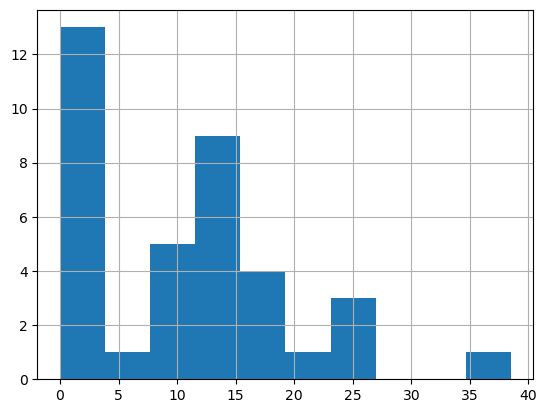

In [53]:
mens_ago['bolsa%'].hist()

Gráfico comparando os valores da concorrência, o modelo proposo e os valores pagos em 2023.

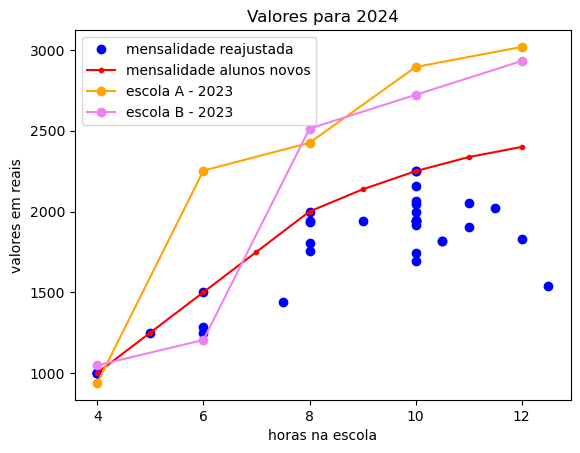

In [54]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['reajustado'],
    marker='o',
    color='blue',
    lw=0,
    label='mensalidade reajustada',
)

ax.plot(
    h,
    v_modelo3(h),
    marker='.',
    color='red',
    linestyle='-',
    label='mensalidade alunos novos',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['A'],
    marker='o',
    color='orange',
    linestyle='-',
    label='escola A - 2023',
)

ax.plot(
    concorrencia['horas'],
    concorrencia['B'],
    marker='o',
    color='violet',
    linestyle='-',
    label='escola B - 2023',
)

ax.set_title('Valores para 2024')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_modelo3_reajuste.png')

# Criando tabela de mensalidades
Ficou decidido com a direção da escola que os alunos novos seguirão a tabela nova de mensalidades e os alunos antigos terão um aumento máximo de 12%. Os alunos com valores que ficaram abaixo da tabela de 2024 terão a diferença percentual transformada em bolsa. O desconto pontualidade será mantido. Para que não prejudique o orçamento, será incluído nas mensalidades.


In [55]:
def modelo2024(h):
    return np.round(modelo3(h)/0.95,2)

# vetorizando a função para receber arrays de argumento
v_modelo2024 = np.vectorize(modelo2024)

In [56]:
mensalidades_novos_2024 = pd.DataFrame()
mensalidades_novos_2024['horas']=h
mensalidades_novos_2024['valores 2024']=v_modelo2024(h)

mensalidades_novos_2024.to_csv('../dados/mensalidades_novos_2024.csv',index=False)

mensalidades_novos_2024

,horas,valores 2024
0,4,1052.63
1,5,1315.79
2,6,1578.95
3,7,1842.11
4,8,2105.26
5,9,2250.00
6,10,2368.42
7,11,2460.53
8,12,2526.32


In [57]:
mensalidades_antigos_2024 = pd.DataFrame()
mensalidades_antigos_2024['horas'] = mens_ago['horas']
mensalidades_antigos_2024['valores 2024']  = mens_ago['reajustado']
mensalidades_antigos_2024['bolsa %']  = mens_ago['bolsa%']

mensalidades_antigos_2024.to_csv('../dados/mensalidades_antigos_2024.csv',index=False)

mensalidades_antigos_2024 

,horas,valores 2024,bolsa %
0,4.0,1000.00,0.0
1,4.0,1000.00,0.0
2,4.0,1000.00,0.0
3,4.0,1000.00,0.0
4,4.0,1000.00,0.0
5,4.0,1000.00,0.0
6,5.0,1250.00,0.0
7,6.0,1281.87,14.5
8,6.0,1249.75,16.7
9,6.0,1500.00,0.0


Gráfico do resultado final

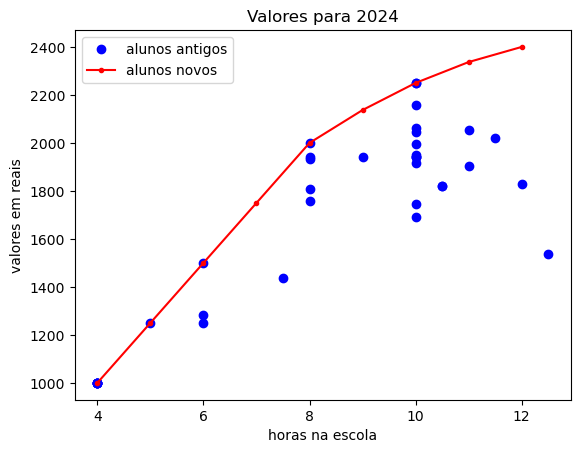

In [58]:
fig, ax = plt.subplots()

ax.plot(
    mens_ago['horas'],
    mens_ago['reajustado'],
    marker='o',
    color='blue',
    lw=0,
    label='alunos antigos',
)

ax.plot(
    h,
    v_modelo3(h),
    marker='.',
    color='red',
    linestyle='-',
    label='alunos novos',
)

ax.set_title('Valores para 2024')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2024.png')

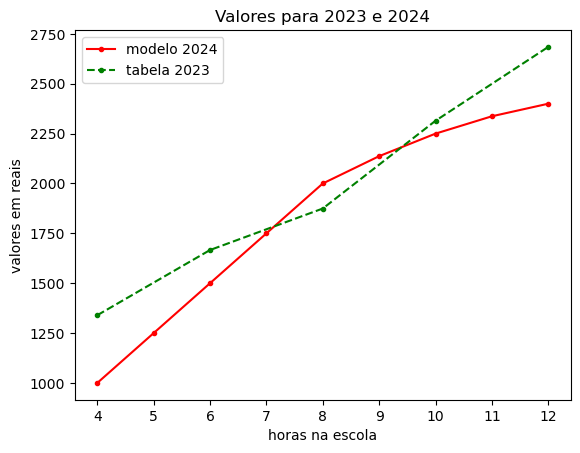

In [71]:
fig, ax = plt.subplots()

ax.plot(
    h,
    v_modelo3(h),
    marker='.',
    color='red',
    linestyle='-',
    label='modelo 2024',
)

ax.plot(
    plano_2023['horas'],
    plano_2023['valores'],
    marker='.',
    color='green',
    linestyle='dashed',
    label='tabela 2023',
)

ax.set_title('Valores para 2023 e 2024')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')
ax.legend(loc='upper left', ncols=1)

fig.savefig('../imagens/mensalidades_2023e2024.png')

# Potencial de ganhos

In [63]:
# tabela 2023
mens_ago['tabelado'].sum()

75692.37749999999

In [67]:
# tabela 2024
mens_ago['modelo 3'].sum()

71350.0

In [68]:
# discrepância entre os modelos
(mens_ago['tabelado'].sum()-mens_ago['modelo 3'].sum())/mens_ago['tabelado'].sum()

0.0573687555262746

# Coleta de dados para viabilidade

In [78]:
# mensalidade média - alunos antigos
mens_ago['reajustado'].describe()

count      37.000000
mean     1702.117297
std       397.476361
min      1000.000000
25%      1437.630000
50%      1830.860000
75%      1950.050000
max      2250.000000
Name: reajustado, dtype: float64

In [79]:
# mensalidade média - alunos novos
mens_ago['modelo 3'].describe()

count      37.000000
mean     1928.378378
std       494.539617
min      1000.000000
25%      1500.000000
50%      2231.250000
75%      2250.000000
max      2500.000000
Name: modelo 3, dtype: float64